In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, tests_carried_out, daily_vaccinations, population_vaccinated, unique_people_tested
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
80,779 cases (7 day average) as of Sat 22 Jan, +317.4 since Fri 21 Jan
1,574 hospitalised (7 day average) as of Tue 25 Jan, -46.9 since Sun 23 Jan
219 died (7 day average) as of Sat 22 Jan, +4.0 since Fri 21 Jan


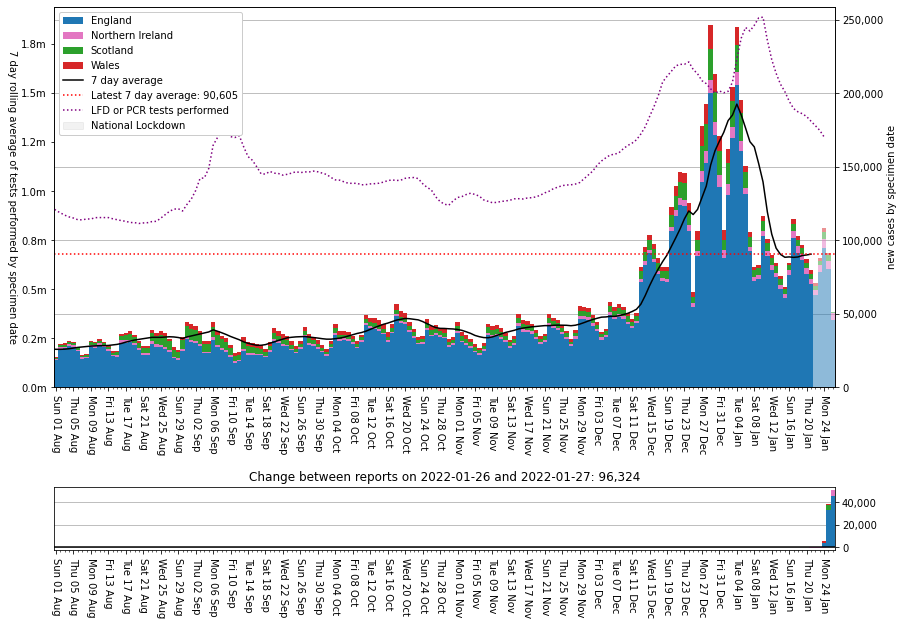

In [3]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b', earliest='2021-08', diff_ylims=None)

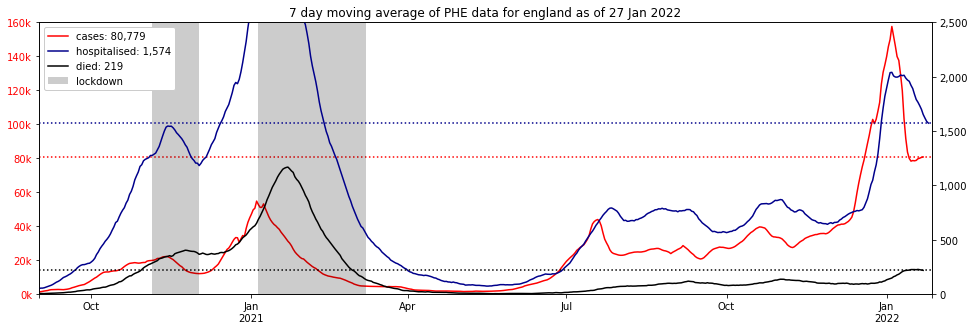

In [4]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=160_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=2500)

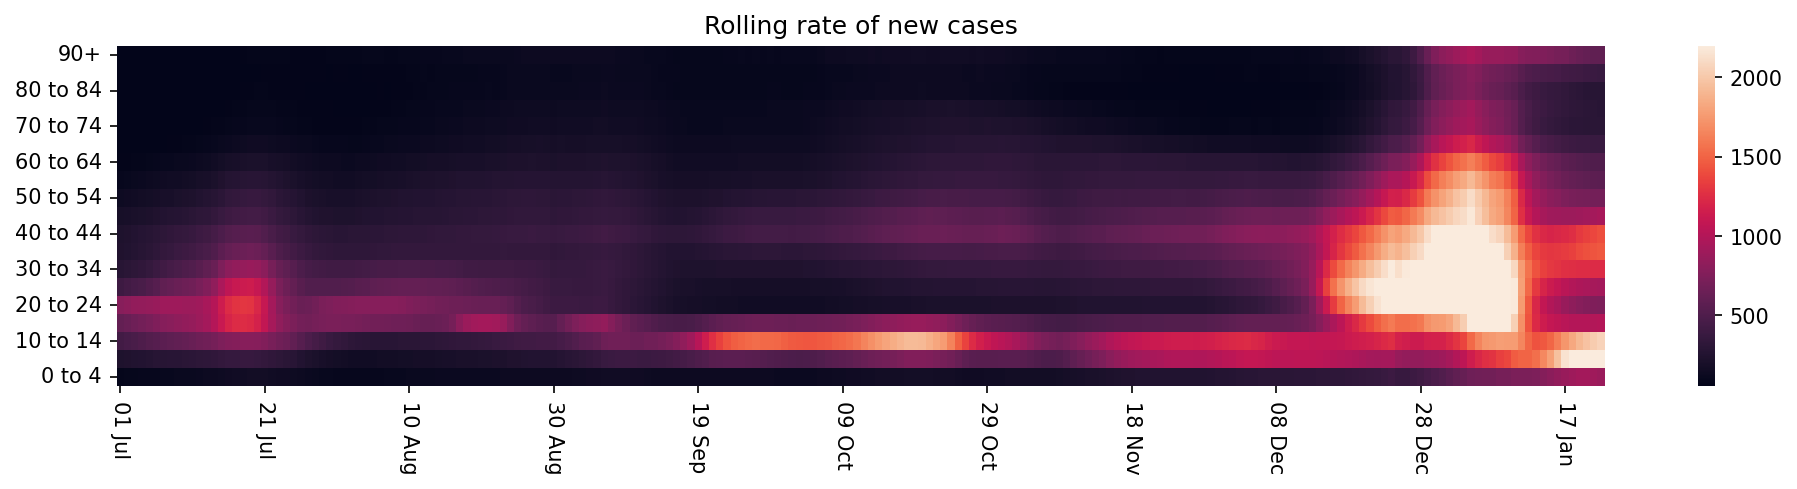

In [5]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2021-07')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

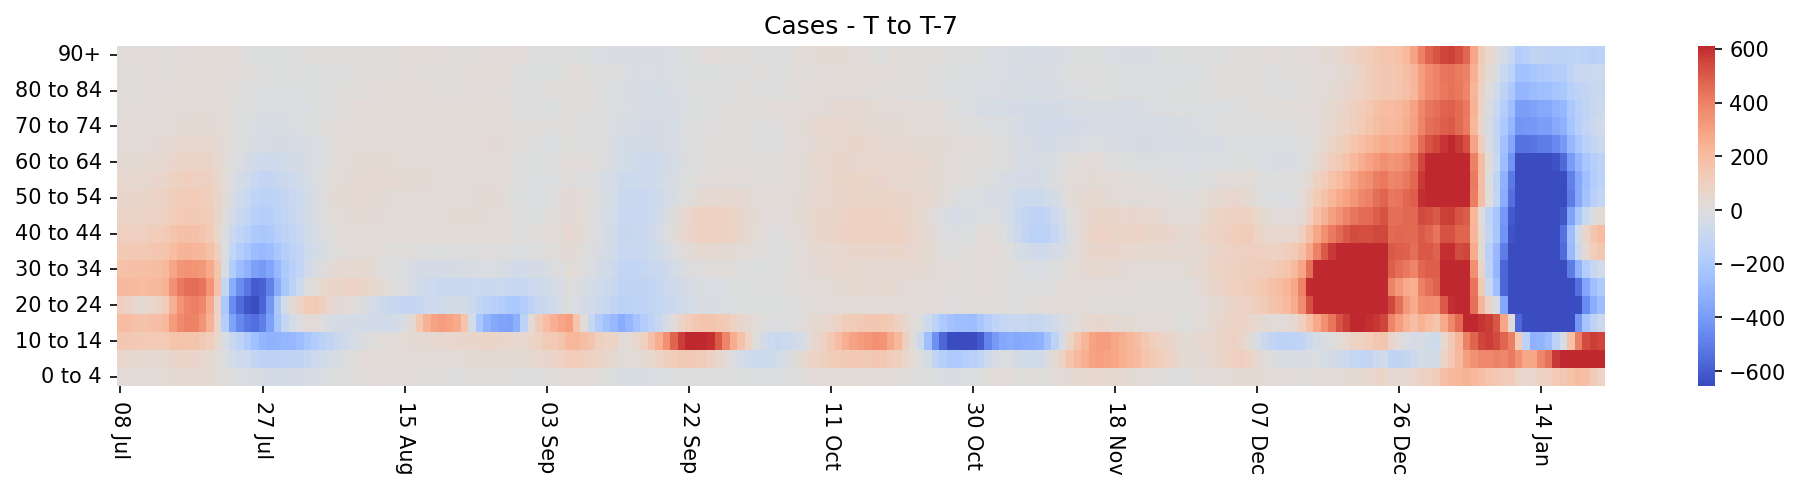

In [6]:
heatmap(diff(data, days=7), title='Cases - T to T-7', figsize=(16, 3), center=0, cmap='coolwarm')

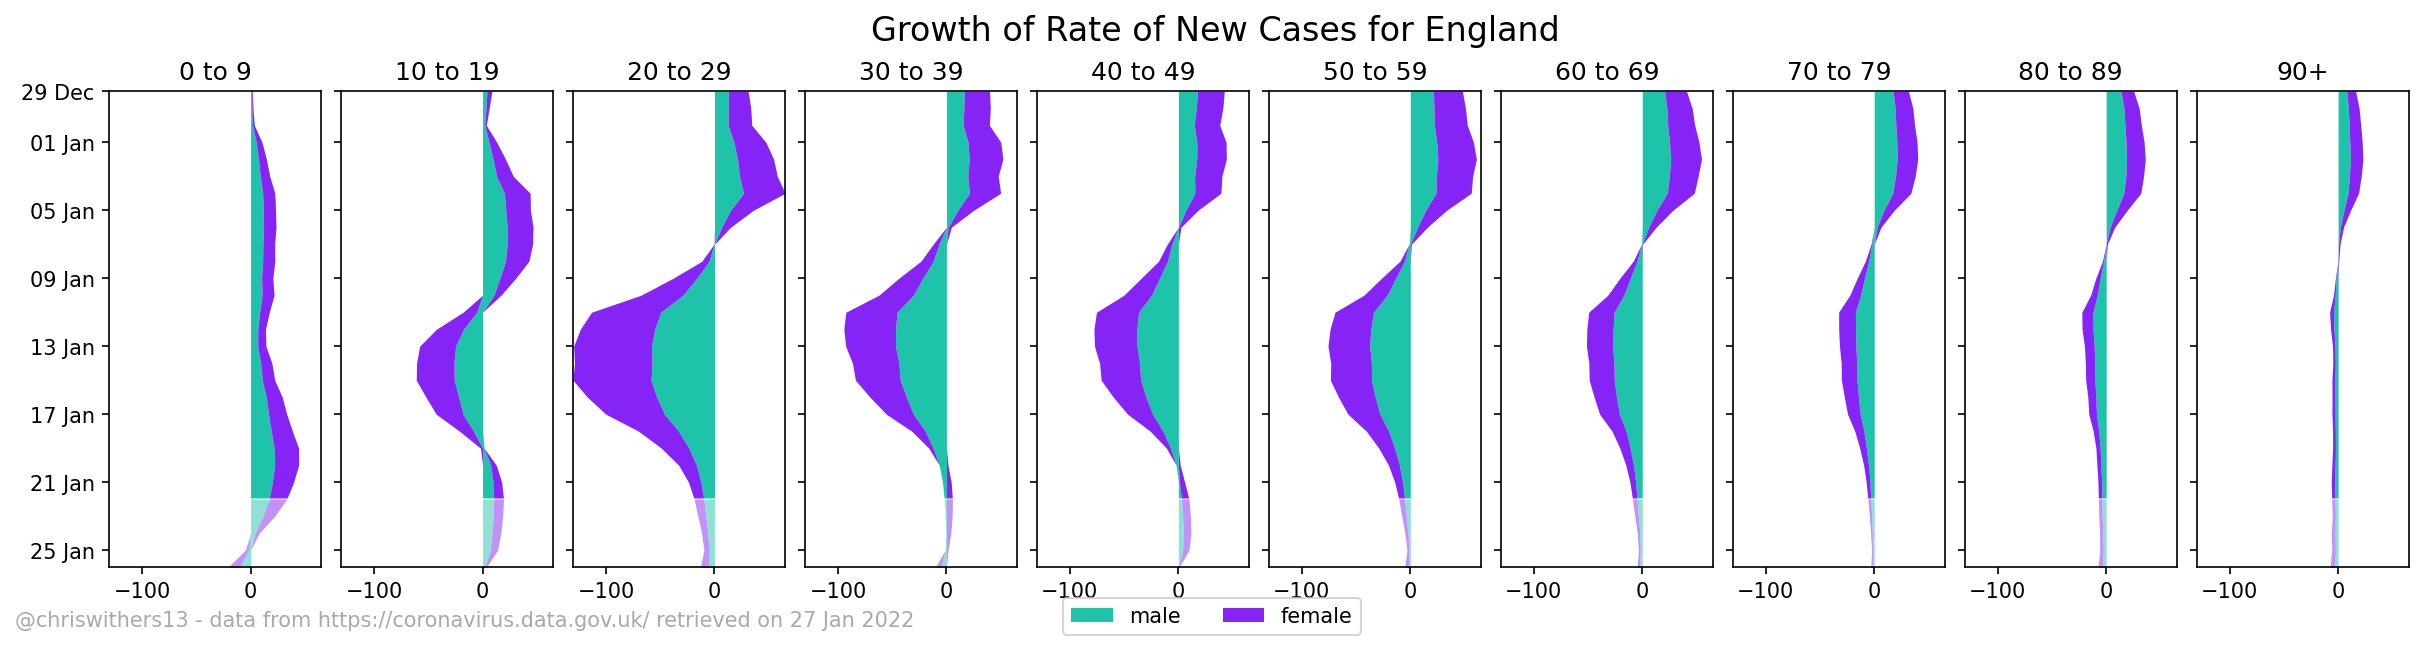

In [7]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

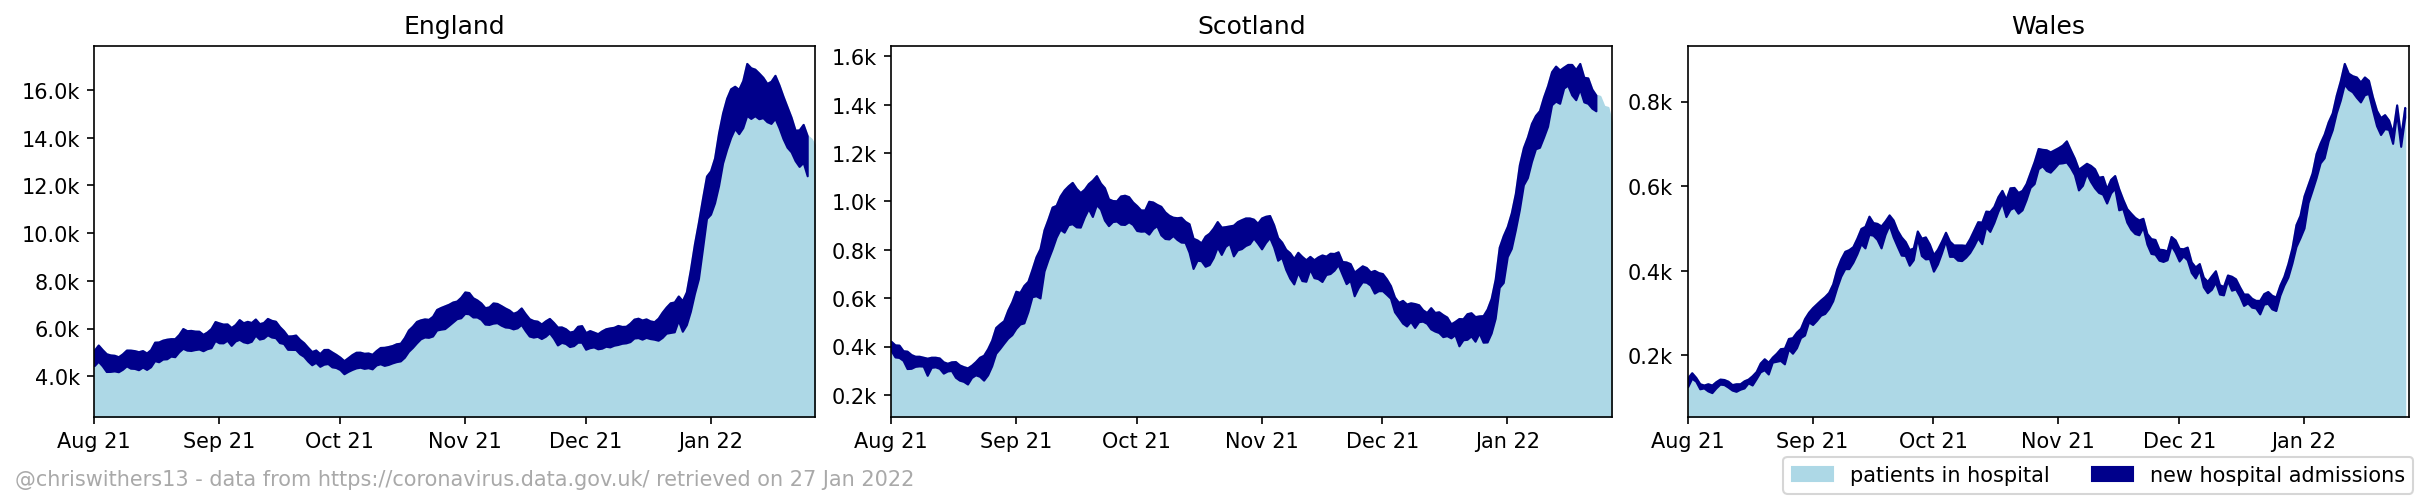

In [8]:
hospital_plot(start='2021-08', figsize=(16,3), figs=(1, 3), ymin=None)

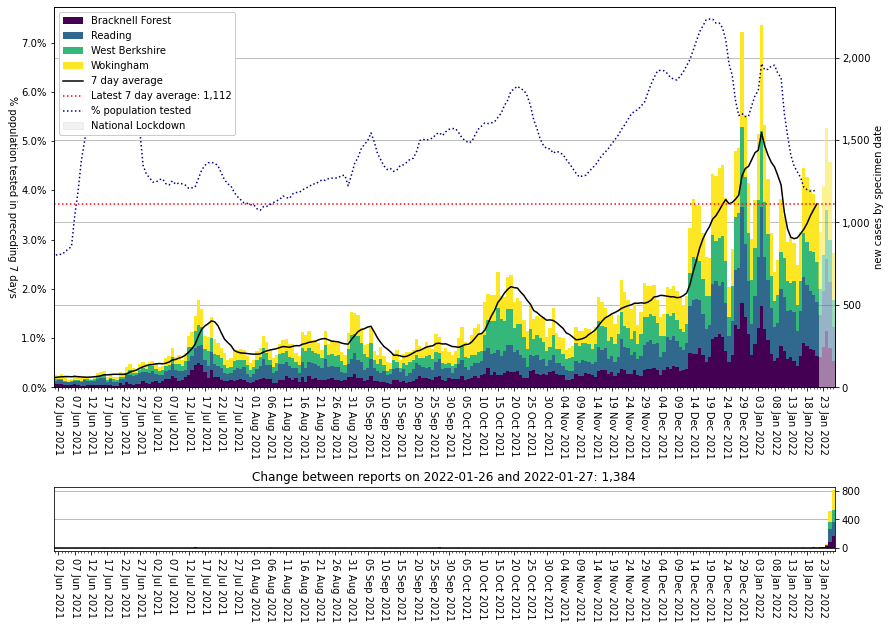

In [9]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

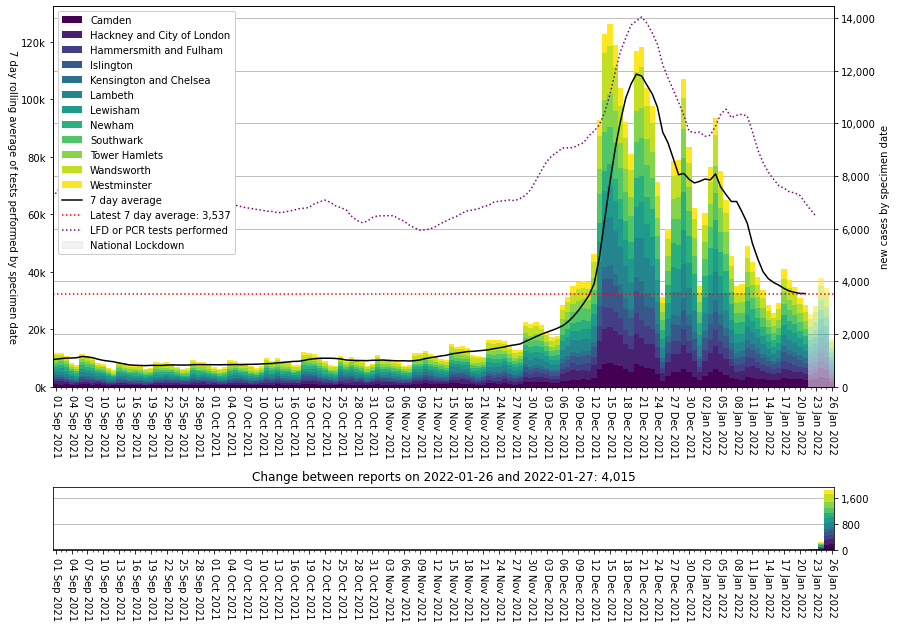

In [10]:
plot_areas(for_date, areas=london_areas, earliest='2021-09', lines=tests_carried_out)

In [11]:
data = recent_cases_summed(days=7, exclude_days=1)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                              
N09000002  Armagh City, Banbridge and Craigavon         2124.372702   
N09000010                Newry, Mourne and Down         2043.359358   
N09000007               Lisburn and Castlereagh         1958.877276   
N09000001               Antrim and Newtownabbey         1827.126770   
N09000011                   Ards and North Down         1794.404081   
N09000008                   Mid and East Antrim         1723.221850   
E07000008                             Cambridge         1697.943877   
E07000217                                Woking         1690.593593   
E06000031                          Peterborough         1657.281011   
E06000041                             Wokingham         1647.975970   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
N09000002                  4593.0    2022-01-25  
N09000010                  3706.0    2022-01-25  
N09000007                  2860.0    2022-01-25  
N09000001                  2622.0    2022-01-25  
N09000011                  2902.0    2022-01-25  
N09000008                  2400.0    2022-01-25  
E07000008                  2119.0    2022-01-25  
E07000217                  1704.0    2022-01-25  
E06000031                  3352.0    2022-01-25  
E06000041                  2820.0    2022-01-25

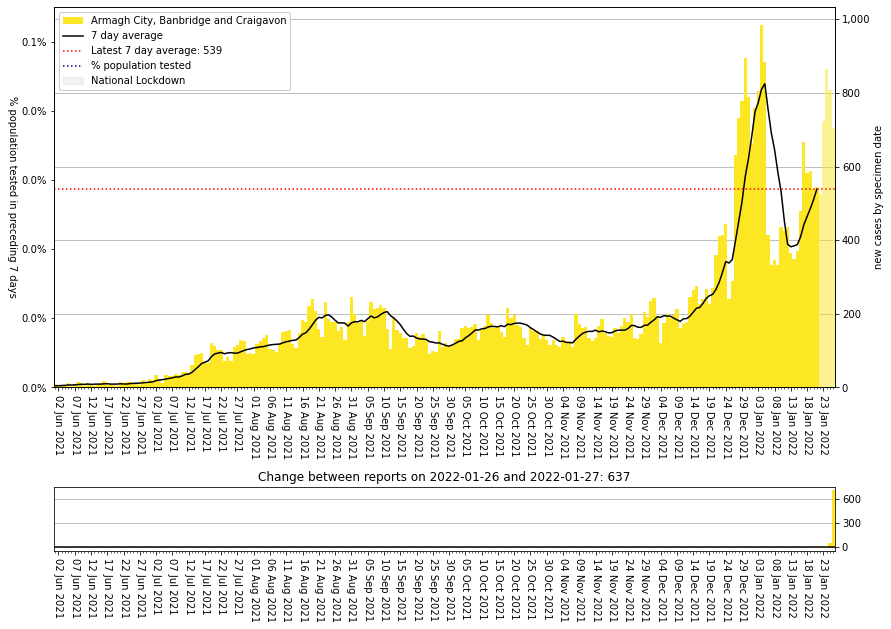

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                              
E08000025                            Birmingham          859.595592   
E08000035                                 Leeds         1025.167089   
E06000047                         County Durham         1216.576683   
E08000032                              Bradford         1040.987373   
E08000019                             Sheffield          935.961686   
N09000003                               Belfast         1554.395096   
E06000054                             Wiltshire         1013.551350   
E06000052          Cornwall and Isles of Scilly          818.989790   
E06000023                      Bristol, City of         1010.624179   
N09000002  Armagh City, Banbridge and Craigavon         2124.372702   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E08000025                  9815.0    2022-01-25  
E08000035                  8131.0    2022-01-25  
E06000047                  6449.0    2022-01-25  
E08000032                  5619.0    2022-01-25  
E08000019                  5474.0    2022-01-25  
N09000003                  5340.0    2022-01-25  
E06000054                  5068.0    2022-01-25  
E06000052                  4683.0    2022-01-25  
E06000023                  4683.0    2022-01-25  
N09000002                  4593.0    2022-01-25

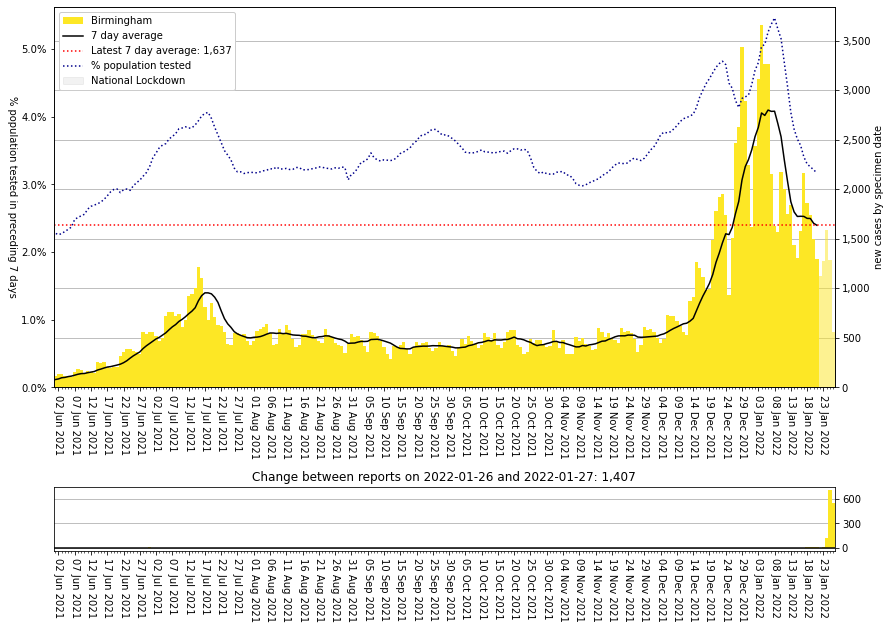

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

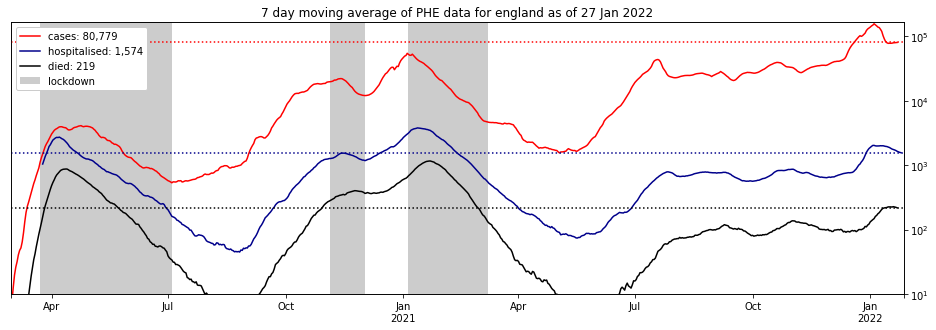

In [16]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

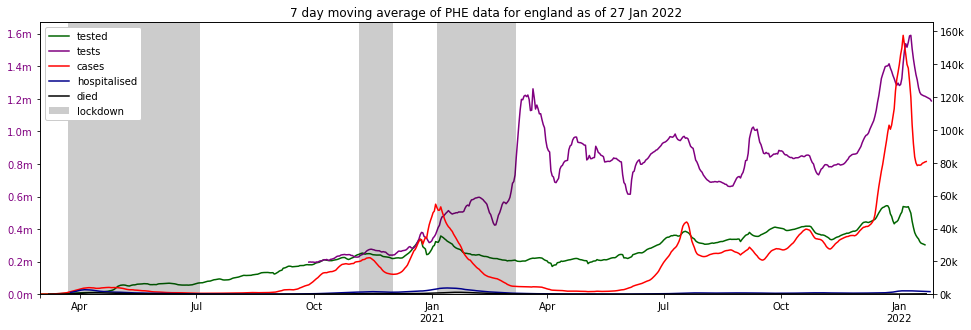

In [17]:
plot_summary(left_series=(s.unique_people_tested_sum, s.reported_virus_tests_sum), left_formatter=per1m_formatter,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

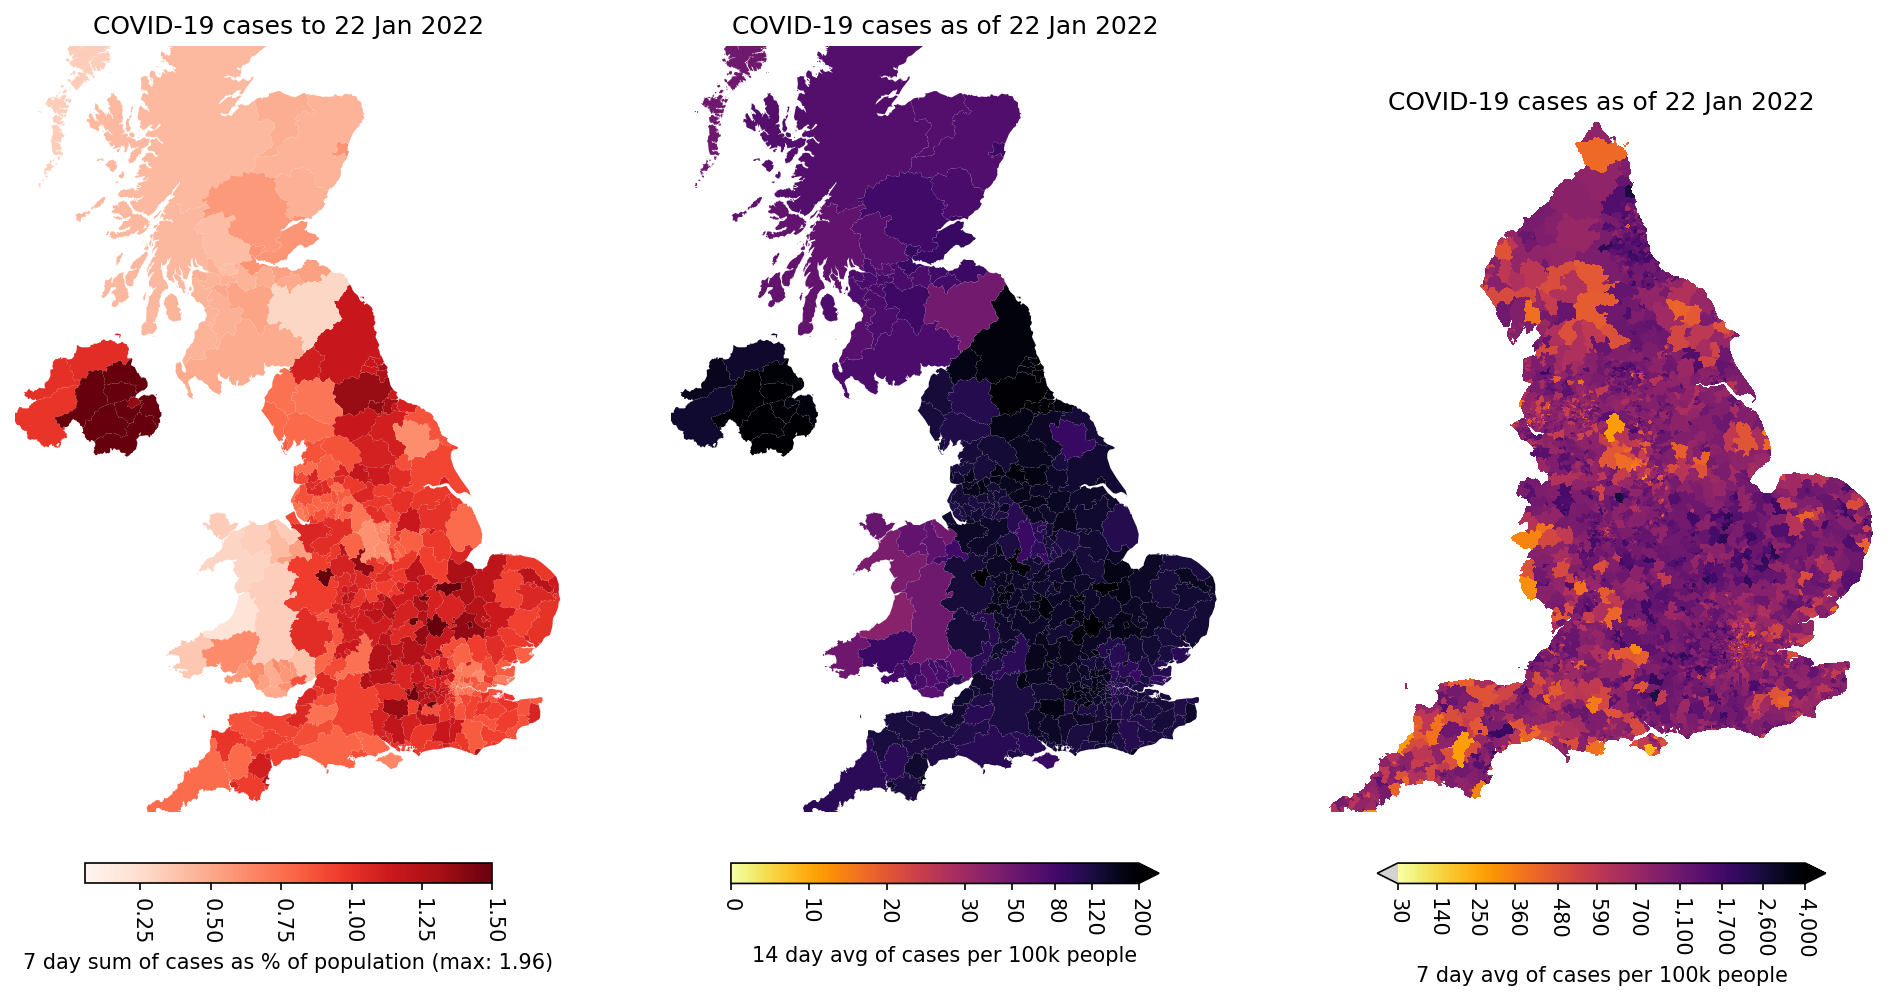

Loading BokehJS ...

In [18]:
case_maps(sum_vmax=1.5, exclude_days=4)